In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pearson_util 
import descartes
import pygeoj
import matplotlib.pyplot as plt


In [2]:
gdf_dw = gpd.read_file('C:/Users/seanp/python/NUTS_RG_60M_2016_3035_LEVL_3.geojson')
gdf_dw.iloc[1318:1522]

,id,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry
1318,RO414,3,4,Olt,RO,RO414,RO414,Olt,3,3,"POLYGON ((5500624.645 2481498.725, 5496185.887..."
1319,RO415,3,2,Vâlcea,RO,RO415,RO415,Vâlcea,3,3,"POLYGON ((5457799.893 2527102.235, 5447340.912..."
1320,UKH25,3,4,Central Bedfordshire,UK,UKH25,UKH25,Central Bedfordshire,3,1,"POLYGON ((3627278.940 3267434.368, 3608276.298..."
1321,UKH31,1,4,Southend-on-Sea,UK,UKH31,UKH31,Southend-on-Sea,3,1,"POLYGON ((3681173.766 3201641.834, 3684013.709..."
1322,UKH32,1,4,Thurrock,UK,UKH32,UKH32,Thurrock,3,1,"POLYGON ((3664855.621 3200561.199, 3654719.164..."
...,...,...,...,...,...,...,...,...,...,...,...
1517,UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262..."
1518,UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604..."
1519,UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224..."
1520,UKH23,2,4,Hertfordshire,UK,UKH23,UKH23,Hertfordshire,3,1,"POLYGON ((3641428.795 3257056.214, 3631036.624..."


In [3]:
gdf = gpd.read_file('https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2016_3035_LEVL_3.geojson')

# Creating dataframes of average national annual road freight transport by regions (NUTS 3) and by group of goods (1 000 t)

In [4]:
#National annual road freight transport by regions of unloading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_ru3g)
df_unloading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_ru3g.tsv.gz',['subsector', 'unit', 'region'])

In [5]:
df_unloading_total = df_unloading.loc['TOTAL']

In [6]:
df_unloading_total = df_unloading_total.droplevel(0)

In [7]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_unloading_nuts3 = df_unloading_total.reindex(gdf.set_index('id').index)

In [8]:
#filters the countries that have no data
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [9]:
#National annual road freight transport by regions of loading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_rl3g
df_loading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_rl3g.tsv.gz',['subsector', 'unit', 'region'])

In [10]:
df_loading_total = df_loading.loc['TOTAL']

In [11]:
df_loading_total = df_loading_total.droplevel(0)

In [12]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_loading_nuts3 = df_loading_total.reindex(gdf.set_index('id').index)

In [13]:
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [14]:
df_loading_nuts3.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,31164.0,23410.0,22302.0,22533.0,20556.0,16265.0,15133.0,14044.0,17536.0,12320.0,16522.0,17859.0
CZ053,27127.0,20301.0,20399.0,21064.0,19896.0,16948.0,15222.0,12602.0,14166.0,14423.0,16343.0,20090.0
CZ063,22196.0,26155.0,18682.0,20785.0,19078.0,15516.0,12487.0,9854.0,13296.0,14551.0,18543.0,20061.0
CZ064,49041.0,47453.0,43448.0,38848.0,40457.0,35683.0,29350.0,25806.0,26051.0,27880.0,31335.0,40006.0
CZ071,37656.0,34631.0,29204.0,26120.0,25596.0,26760.0,18776.0,23872.0,21159.0,19474.0,25554.0,25133.0


In [15]:
#Concatinates df --> takes 2 df and joins them together
df_average_transport_total = pd.concat((df_unloading_nuts3, df_loading_nuts3))

In [16]:
#takes lines with same index and calculates mean of them
df_average_transport_total = df_average_transport_total.groupby(df_average_transport_total.index).mean()

In [17]:
#sets the index 'country' and takes it from the cntr_code column of the gdf
df_average_transport_total = df_average_transport_total.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)

In [18]:
df_average_transport_total.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,4986.5,3731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,4350.5,4223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compacted

In [19]:
#unloading
df_unloading_GT01 = df_unloading.loc['GT01']
df_unloading_GT01 = df_unloading_GT01.droplevel(0)
df_unloading_GT01_nuts3 = df_unloading_GT01.reindex(gdf.set_index('id').index)
#loading
df_loading_GT01 = df_loading.loc['GT01']
df_loading_GT01 = df_loading_GT01.droplevel(0)
df_loading_GT01_nuts3 = df_loading_GT01.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT01 = pd.concat((df_unloading_GT01_nuts3, df_loading_GT01_nuts3))
df_average_transport_GT01 = df_average_transport_GT01.groupby(df_average_transport_GT01.index).mean()
df_average_transport_GT01 = df_average_transport_GT01.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT01 = df_average_transport_GT01.div(df_average_transport_total)
df_transport_share_GT01.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.147568,0.065865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,0.040102,0.067701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,0.030420,0.016727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.150607,0.081211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.092058,0.085958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#unloading
df_unloading_GT02 = df_unloading.loc['GT02']
df_unloading_GT02 = df_unloading_GT02.droplevel(0)
df_unloading_GT02_nuts3 = df_unloading_GT02.reindex(gdf.set_index('id').index)
#loading
df_loading_GT02 = df_loading.loc['GT02']
df_loading_GT02 = df_loading_GT02.droplevel(0)
df_loading_GT02_nuts3 = df_loading_GT02.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT02 = pd.concat((df_unloading_GT02_nuts3, df_loading_GT02_nuts3))
df_average_transport_GT02 = df_average_transport_GT02.groupby(df_average_transport_GT02.index).mean()
df_average_transport_GT02 = df_average_transport_GT02.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT02 = df_average_transport_GT02.div(df_average_transport_total)
df_transport_share_GT02.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.013824,0.006316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,NaN,0.010650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.002607,0.006433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.030341,0.002842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multiply shares of transported good types with transportdistance and amount of these good types = amount of specific good types transported for specific distance in each NUTS 3 region

In [61]:
df_transportdistance = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_dctg.tsv.gz',['Type_of_carriage', 'Distance','Subsector', 'Unit', 'Country'])

In [62]:
df_transportdistance

2019       2018   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1904.0     2007.0   
                                           BE          4249.0     3975.0   
                                           BG          1581.0     1850.0   
                                           CH          1355.0     1009.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        444460.0   475457.0   
                                           SI         54439.0    50164.0   
                                           SK        142892.0   128855.0   
                                           UK       1453669.0  1408269.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2017       2016   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2275.0     2138.0   
                                           BE          3238.0     3754.0   
                                           BG          1921.0     1767.0   
                                           CH           949.0     1027.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        449691.0   426715.0   
                                           SI         54027.0    46096.0   
                                           SK        128789.0   105812.0   
                                           UK       1402948.0  1435273.0   
                           UNK       THS_T UK             NaN        1.0   

                                                        2015       2014   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2131.0     1759.0   
                                           BE          4607.0     2015.0   
                                           BG          2249.0     2017.0   
                                           CH          1447.0     1117.0   
                                           CY             1.0        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        416940.0   375707.0   
                                           SI         43530.0    50698.0   
                                           SK        100698.0   101173.0   
                                           UK       1450651.0  1329869.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2013       2012   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1689.0     2037.0   
                                           BE          1766.0     2039.0   
                                           BG          1858.0     1479.0   
                                           CH          1412.0      825.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        276659.0   290008.0   
                                           SI         42608.0    40847.0   
                                           SK         92402.0    94709.0   
                                           UK       1328683.0  1445128.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2011       2010   \
Type_of_carriage Distanc

In [63]:
#distance is not selected yet. 'TOT' is all distance classes
df_transportdistance = df_transportdistance.loc[('TOT', 'TOTAL', 'GT01')]
df_transportdistance = df_transportdistance.droplevel(0)
df_transportdistance

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Country,,,,,,,,,,,,
AT,20123.0,20403.0,21207.0,20101.0,18420.0,17585.0,16393.0,17401.0,16792.0,16982.0,16158.0,16370.0
BE,15288.0,14830.0,17183.0,15166.0,22226.0,15810.0,13565.0,15258.0,12517.0,12269.0,12766.0,12279.0
BG,18391.0,16911.0,20428.0,13730.0,15953.0,15894.0,17106.0,13491.0,12620.0,11862.0,9458.0,9437.0
CH,20354.0,18403.0,18184.0,21628.0,20123.0,17602.0,19401.0,16091.0,14448.0,17053.0,14878.0,17348.0
CY,1997.0,2448.0,2290.0,1706.0,1570.0,1103.0,1530.0,2401.0,1451.0,1724.0,2016.0,1689.0
CZ,48847.0,43147.0,44013.0,43167.0,43299.0,42064.0,42518.0,38820.0,37777.0,36917.0,37724.0,42282.0
DE,160035.0,159232.0,160675.0,154649.0,163074.0,166528.0,142776.0,153366.0,153241.0,145574.0,135254.0,139583.0
DK,29243.0,28607.0,27276.0,25282.0,26735.0,24098.0,22827.0,27611.0,29493.0,23662.0,19153.0,22636.0
EE,4787.0,4034.0,4478.0,3625.0,3321.0,4194.0,3868.0,4075.0,3926.0,3906.0,3154.0,2992.0


In [64]:
#mulitply transport_share_goodstype with transportamount and can be selected by distance
df_transportdistance_share_GT01 = df_transport_share_GT01.multiply(df_transportdistance, level = 'country')
df_transportdistance_share_GT01

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,13544.112592,7386.260752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,3680.611127,7592.215883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,2791.993333,1875.777472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Adding column to gdf

In [24]:
df_transportdistance_share_GT01.columns = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']

In [25]:
#droping country index
df_tds_GT01 = df_transportdistance_share_GT01.droplevel(1)

In [26]:
#set the id column as an index so pandas will align the id of the gdf with the id of the df
gdf_dw = gdf_dw.set_index('id')

In [27]:
#add the data from the df to the gdf
gdf1 = gdf_dw.join(df_tds_GT01)
gdf_select = gdf1.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000'])

# Mapping new gdf

<AxesSubplot:>

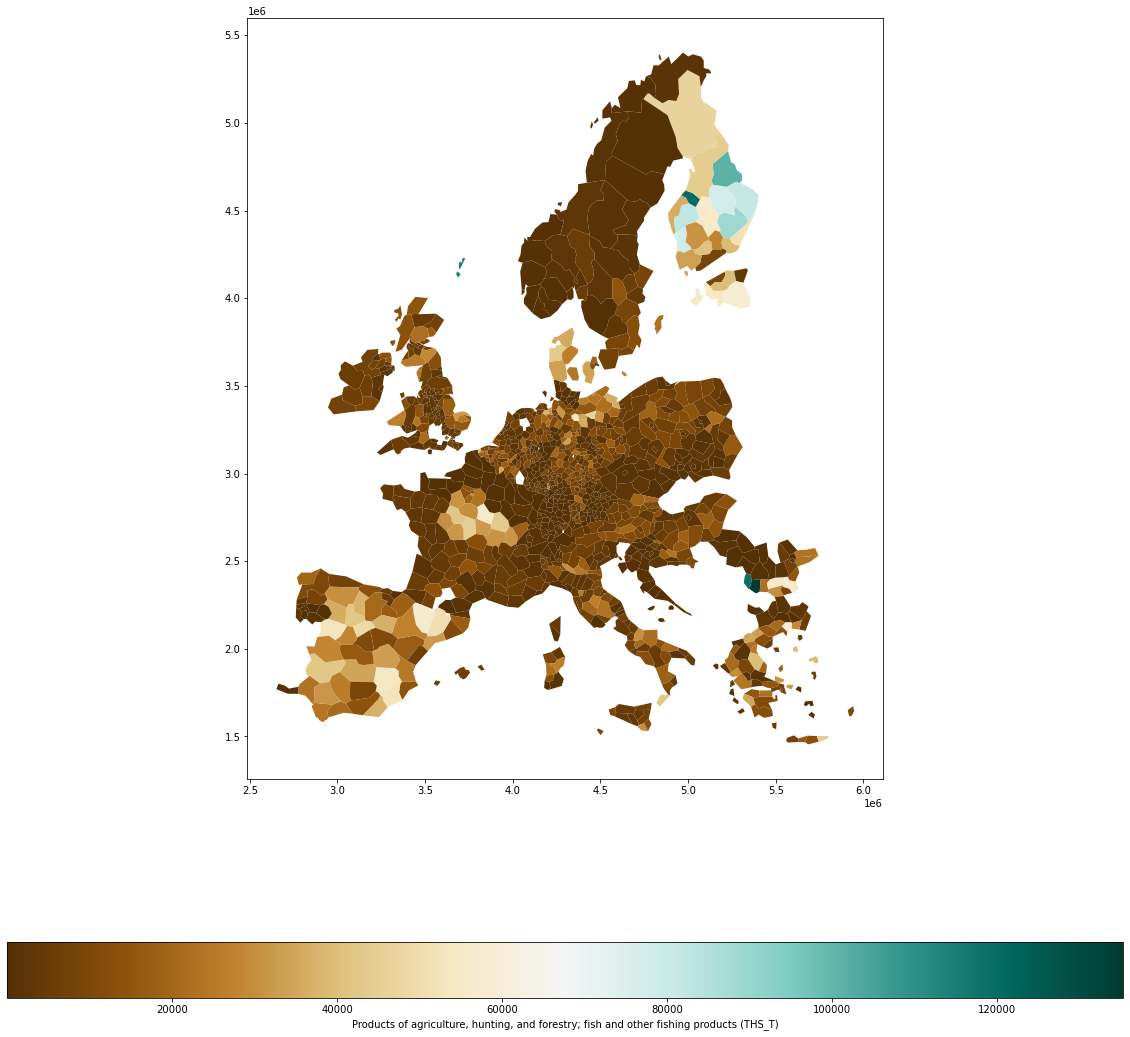

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
gdf_select.plot(column = '2019', 
          ax = ax, 
          legend=True,
         legend_kwds = {'label': 'Products of agriculture, hunting, and forestry; fish and other fishing products (THS_T)',
                        'orientation': "horizontal"},
         cmap = 'BrBG',
         
         )
        

# Calculating Energy consumption of Transport fleet

In [78]:
df_unloading_nuts3.add(df_loading_nuts3).div(2)

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,30566.5,24156.5,22344.0,23101.5,21262.0,16435.5,15466.0,14171.5,17763.5,12760.0,17055.5,18191.5
CZ053,27263.5,18312.0,19943.5,20402.0,19398.5,16567.5,14913.0,12548.0,14380.5,13667.0,16245.0,19502.5
CZ063,22273.5,27052.0,19763.0,21294.5,19425.5,16143.0,13031.0,10432.0,13433.0,15368.0,18848.5,20392.5
CZ064,49650.0,47584.0,43697.0,38654.0,40325.0,35764.0,29289.5,25955.5,26046.5,28093.5,31522.0,39921.0
CZ071,36550.5,34289.5,28053.5,25442.5,24919.5,25613.0,17271.0,23079.0,19929.5,18764.5,24343.0,24150.5
...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,8230.0,7594.0,6323.0,8149.5,5257.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,7337.0,9184.0,9038.5,12646.0,9626.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,2770.0,2196.0,2311.0,2416.5,1317.0,1453.5,1216.5,1337.0,1936.5,2065.5,3413.5,1993.5


In [79]:
#load national transport amount with NUTS 3 regions, take average of un- loading, sum up total transport
df_average_transport_total_EC = df_unloading_nuts3.add(df_loading_nuts3).div(2)
df_average_transport_total_EC = df_average_transport_total_EC.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
sum_total_national_transport = df_average_transport_total_EC.groupby('country').sum()

In [80]:
df_average_transport_total_EC.iloc[1320:1522]

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKH25,UK,6905.5,6347.0,6146.0,7611.0,8662.5,6463.0,5062.0,9614.0,NaN,NaN,NaN,NaN
UKH31,UK,1801.0,721.0,435.5,1118.5,530.5,1480.5,1016.5,732.0,713.5,1004.0,826.5,1082.5
UKH32,UK,25947.5,25773.0,21504.5,27454.0,21428.0,15625.5,19223.0,19511.5,28540.0,24604.5,18238.0,26465.0
UKH34,UK,7874.5,9607.5,7725.0,5770.5,6262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH35,UK,6341.0,5087.0,6735.0,7111.5,6451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,8230.0,7594.0,6323.0,8149.5,5257.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,7337.0,9184.0,9038.5,12646.0,9626.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,2770.0,2196.0,2311.0,2416.5,1317.0,1453.5,1216.5,1337.0,1936.5,2065.5,3413.5,1993.5


In [83]:
test = df_average_transport_total_EC.xs('UK', level='country')
test.sum()

2019     1453669.5
2018     1408268.5
2017     1260223.5
2016     1288953.0
2015     1307366.5
2014      913905.5
2013      924387.0
2012      995509.0
2011      838530.0
2010      873381.0
2009      833711.0
2008      987731.5
dtype: float64

In [82]:
sum_total_national_transport

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,377402.0,367527.5,360241.0,350227.0,325651.0,323233.5,300228.5,305378.5,313114.5,299971.5,303059.0,332079.0
BE,229611.0,233204.5,238837.5,233722.0,234554.0,250709.5,248857.0,239135.0,233721.0,237050.0,233592.0,249626.5
BG,97573.5,121892.5,119698.0,114631.0,134360.5,134264.0,138756.0,122173.0,121627.5,118090.5,136857.0,168592.5
CH,289299.0,283433.5,281639.0,274094.0,278494.0,290786.0,283820.0,287500.0,287909.0,269302.0,270984.5,275411.0
CY,29333.0,29280.0,25569.0,19661.0,14384.0,14569.0,16099.0,22941.0,26018.0,32216.0,28493.0,41601.0
CZ,475527.0,446685.5,418791.0,383311.5,375350.0,324080.5,289114.0,281340.0,288522.5,301390.0,324977.5,382382.5
DE,3093879.0,3078252.5,3022419.0,2969829.5,2894485.0,2848168.0,2737923.0,2686772.0,2495777.0,2274422.0,2299569.5,2547768.0
DK,162569.0,162033.0,174017.5,178672.5,175130.5,171258.5,165531.5,167193.0,169413.0,156751.0,137872.0,179252.0


In [105]:
#calculates the share that each region has of the total goods transported in the country
share_total_national_transport_region = df_average_transport_total_EC.divide(sum_total_national_transport, level = 'country')
share_total_national_transport_region
test = share_total_national_transport_region.sum(level='country', min_count=1)
test.columns = test.columns.astype(int) #  test.columns.str.strip()
assert (test[2019].dropna().round(2) == 1.00).all()

In [33]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
#multiplay international transport with share of total national tranport for each region
international_transport_region = share_total_national_transport_region.multiply(df_average_transport_total_int_EC)
#sum of national and international transport
df_average_transport_total = df_average_transport_total.droplevel(1)
international_transport_region = international_transport_region.droplevel(1)
total_national_international_transport_region = pd.concat((international_transport_region, df_average_transport_total))
total_national_international_transport_region = total_national_international_transport_region.groupby('id').sum()
total_national_international_transport_region

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
AL011,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL012,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL013,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL014,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL015,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,3018.620540,3343.546896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKN13,5340.907062,3304.832142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKN14,4826.072380,2374.672479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
international_transport_region

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
AL011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,16.620540,18.546896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,29.407062,18.332142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,26.572380,13.172479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_average_transport_total

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
AL011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#share of Mio Vehicle km driven in each region
df_total_transport_mio_Tkm_country_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.loc[('TOT', 'TOTAL', 'MIO_TKM')]
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Tkm_country_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,26444.0,25763.0,25978.0,26138.0,25458.0,25260.0,24213.0,26089.0,28542.0,28659.0,...,34313.0,37402.0,39187.0,37044.0,39186.0,39557.0,38498.0,37532.0,35122.0,33981.0
BE,34829.0,32685.0,34220.0,35192.0,36078.0,31808.0,32796.0,32105.0,33107.0,35002.0,...,38356.0,42085.0,43017.0,43847.0,47878.0,50542.0,52889.0,53182.0,51047.0,37284.0
BG,20551.0,NaN,35150.0,NaN,32297.0,NaN,27097.0,NaN,21214.0,19433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,11947.0,NaN,12441.0,NaN,12817.0,12966.0,13567.0,NaN,...,13911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,858.0,892.0,826.0,703.0,563.0,538.0,634.0,896.0,941.0,1087.0,...,1308.0,1202.0,1165.0,1393.0,1119.0,1401.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,50315.0,58715.0,54092.0,54893.0,51228.0,54830.0,51832.0,...,50877.0,48141.0,NaN,NaN,46011.0,NaN,NaN,39067.0,37310.0,NaN
DE,311875.0,316772.0,313149.0,315774.0,314816.0,310142.0,305744.0,307009.0,323833.0,313104.0,...,341532.0,343447.0,330016.0,310103.0,303752.0,290745.0,285214.0,288964.0,280708.0,278427.0
DK,14991.0,14998.0,15502.0,16094.0,15500.0,16184.0,NaN,16679.0,16120.0,15018.0,...,NaN,NaN,21254.0,NaN,NaN,NaN,22516.0,NaN,24021.0,23236.0
EE,4794.0,5775.0,NaN,6716.0,NaN,6310.0,5986.0,5791.0,5912.0,NaN,...,7354.0,6417.0,NaN,NaN,NaN,3974.0,NaN,NaN,NaN,NaN


In [47]:
#devide total mio vehicle TKM by total transport per region to get km driven by trucks in that region
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)
km_driven_region = df_total_transport_mio_Tkm_region_EC.divide(total_national_international_transport_region)
km_driven_region

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124286,0.121323
UKN13,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124286,0.121323
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124286,0.121323


In [106]:
df_total_transport_mio_Tkm_region_EC

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.555863,366.227994
UKN13,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.744164,647.974681
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.138397,585.513411


In [107]:
#sum of int + national transport on country level, devide mio Tkm per country by the THS_t transport per country and multipy that with the share of transport per region
total_national_international_transport_country_test = pd.concat((df_average_transport_total_int_EC, sum_total_national_transport))
total_national_international_transport_country_test = total_national_international_transport_country_test.groupby('country').sum()
km_driven_country = df_total_transport_mio_Tkm_country_EC.divide(total_national_international_transport_country_test)
km_driven_region_test = share_total_national_transport_region.multiply(km_driven_country)
km_driven_region_test.sum(level = 'country') 

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
CZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126818,...,0.161320,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,0.000000,0.000000,0.000000
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130297,...,0.134122,0.126673,0.111905,0.109448,0.106830,0.106789,0.104395,0.101804,0.101174,0.099229
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098819,...,0.091736,0.087521,0.082319,0.078040,0.075694,0.075795,0.072439,0.070006,0.068150,0.068274
BE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138013,...,0.133767,0.128727,0.122901,0.121147,0.117292,0.139113,0.136939,0.129660,0.128118,0.138594
BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.159953,0.168159,0.000000,0.187861,0.000000,0.229863,0.000000,0.280363,0.000000,0.202454
CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049346,...,0.000000,0.046077,0.044240,0.044410,0.000000,0.043935,0.000000,0.041803,0.000000,0.000000
CY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031435,...,0.033725,0.036145,0.039037,0.039354,0.036906,0.039116,0.035737,0.032288,0.030449,0.029236
EL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490134,...,0.607063,0.000000,0.000000,0.462947,0.564312,0.047247,0.049967,0.073826,0.082092,0.080670


In [38]:
total_national_international_transport_country_test

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,52853.0,65792.0,68622.0,70244.5,82106.5,80350.5,83372.5,72872.5,74788.0,67201.0,74862.0,94613.5
AT,355783.5,358725.0,348480.0,330528.5,335546.5,345374.0,342229.0,354144.0,353739.5,345803.5,350771.5,378938.5
BE,799657.0,763390.0,733548.0,699330.5,666351.5,619192.5,564112.0,553488.0,556665.0,553291.5,580541.0,661000.0
BG,228546.0,232126.0,225369.0,223290.5,217157.0,226093.0,205359.0,196968.5,199092.5,183338.5,196238.5,213256.5
CH,167084.5,163976.5,161014.0,159783.0,156122.0,160537.0,149291.5,141972.5,139522.0,121131.0,127080.5,143412.0
CY,5383.5,4407.0,4292.5,5484.0,4664.5,5448.0,4789.5,4353.5,3991.5,4717.5,3972.5,4752.0
CZ,55028.0,58990.5,59731.0,61549.0,65633.0,64294.5,61568.0,58000.5,55357.5,51183.0,49186.5,54815.5
DE,3237992.5,3192854.5,3214176.0,3191389.5,3143076.5,2700996.5,2622795.5,2622695.5,2491769.5,2376536.5,2373607.0,2682510.5
DK,107836.0,107891.5,110237.5,105618.5,106491.5,104949.0,104412.5,102217.5,108937.0,104628.5,105423.5,111668.0


In [51]:
km_driven_region_test

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000324,0.000276
UKN13,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000320,0.000489
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000230,0.000442


# Test area

In [ ]:
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)

In [ ]:
test = km_driven_region.iloc[1343:1522]

In [ ]:
print(gdf.iloc[0:5])

In [ ]:
#trying to use different dataset with total transport amount
df_unloading_test = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_ru.tsv.gz',['subsector', 'unit', 'region'])

In [ ]:
idx = pd.IndexSlice
df_unloading_test = df_unloading_test.loc[idx[:,'THS_T'], :]
df_unloading_test = df_unloading_test.droplevel('unit')
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.reindex(gdf.set_index('id').index)




df_unloading_test = df_unloading_test.loc[idx[:,['THS_T']]]
df_unloading_test = df_unloading_test.droplevel(1)
df_unloading_total = df_unloading.loc['THS_T']
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.droplevel(0)

In [ ]:
#sorting gdf according to id so it might aligne with eurostats data
gdf_sort = gdf.sort_values(by=['id'])

In [ ]:
#selecting 2019 column
df_at_2019 = df_average_transport.iloc[:, 0]

In [ ]:
print(df_at_2019.iloc[100:105])

In [ ]:
gdf_sort['TRANSPORT_AMOUNT_2019'] = df_at_2019

In [ ]:
print(gdf_sort.iloc[100:150])

In [ ]:
gdf_sort.head()

In [ ]:
#alinge dataframes and delet all lines with no shared id